<a href="https://colab.research.google.com/github/ssumannb/Shopping_sale_prediction/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### 쇼핑몰 지점별 매출액 예측



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
# data unzip code
# path_zip = './drive/MyDrive/Colab Notebooks/sales_prediction/dataset.zip'
# path_unzip = path_zip+'data/'

# import zipfile

# with zipfile.ZipFile(path_zip, 'r') as zip_ref:
#   zip_ref.extractall(path_unzip)

In [ ]:
import pandas as pd
PATH = './drive/MyDrive/Colab Notebooks/sales_prediction/dataset/'

train_df = pd.read_csv(f'{PATH}train.csv', index_col='id')
test_df = pd.read_csv(f'{PATH}test.csv', index_col='id')

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6255 entries, 1 to 6255
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6255 non-null   int64  
 1   Date          6255 non-null   object 
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    2102 non-null   float64
 5   Promotion2    1592 non-null   float64
 6   Promotion3    1885 non-null   float64
 7   Promotion4    1819 non-null   float64
 8   Promotion5    2115 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   bool   
 11  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 592.5+ KB
None


In [ ]:
train_df.head()
train_df = train_df.fillna(0)

데이터 특징
* index 데이터와 y 데이터를 제외하고 11개의 feature로 구성되어 있음
* 모두 문자열형태로 되어있음

1. Categorical 특징 : ['Store']
2. Binning 할 특징 : ['Date', 'Temperature', 'Fuel_price']

In [ ]:
COL_CAT = ['Store', 'IsHoliday']
COL_DAT = ['Date']
COL_NUM = ['Temperature', 'Fuel_Price', 'Unemployment']

In [ ]:
train_X = train_df.drop('Weekly_Sales', axis=1)
train_y = train_df['Weekly_Sales'].apply(float)

In [ ]:
train_X.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
id,,,,,,,,,,,
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False
2,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True
3,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False
4,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False
5,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False


In [ ]:
# transform the categorical features to dummies
from sklearn.preprocessing import OneHotEncoder

tmp_X = pd.concat([train_X, test_df], axis=0)

ohe = OneHotEncoder(drop='first')
ohe.fit(tmp_X[COL_CAT])
train_X_encoded = ohe.transform(train_X[COL_CAT])
test_encoded = ohe.transform(test_df[COL_CAT])
print(ohe.get_feature_names(COL_CAT))
train_X_encoded_df = pd.DataFrame(train_X_encoded.todense(), columns = ohe.get_feature_names(COL_CAT), index=train_X.index)
test_encoded_df = pd.DataFrame(test_encoded.todense(), columns = ohe.get_feature_names(COL_CAT), index=test_df.index)

train_X = pd.concat([train_X, train_X_encoded_df], axis=1)
train_X = train_X.drop(COL_CAT, axis=1)
test_df = pd.concat([test_df, test_encoded_df], axis=1)
test_df = test_df.drop(COL_CAT, axis=1)
del tmp_X

print(train_X.info())

In [ ]:
print(train_X[COL_NUM].head())
train_X['Date_d'] = train_X['Date'].apply(lambda x: int(x.split('/')[0]))
train_X['Date_m'] = train_X['Date'].apply(lambda x: int(x.split('/')[1]))
train_X['Date_y'] = train_X['Date'].apply(lambda x: int(x.split('/')[2]))
train_X[['Date_d','Date_m', 'Date_y']].head()

# create 'season' feature 
def define_season(month:int) -> str:
  season = {'winter': [1, 2, 12], 
            'spring': [3, 4, 5],
            'summer': [6, 7, 8],
            'autumn': [9, 10, 11]}
  for k, v in season.items():
    if month in v:
      return k

train_X['season'] = train_X['Date_m'].apply(define_season)
train_X['season'].head()

In [ ]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6255 entries, 1 to 6255
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6255 non-null   object 
 1   Temperature     6255 non-null   float64
 2   Fuel_Price      6255 non-null   float64
 3   Promotion1      6255 non-null   float64
 4   Promotion2      6255 non-null   float64
 5   Promotion3      6255 non-null   float64
 6   Promotion4      6255 non-null   float64
 7   Promotion5      6255 non-null   float64
 8   Unemployment    6255 non-null   float64
 9   Store_2         6255 non-null   float64
 10  Store_3         6255 non-null   float64
 11  Store_4         6255 non-null   float64
 12  Store_5         6255 non-null   float64
 13  Store_6         6255 non-null   float64
 14  Store_7         6255 non-null   float64
 15  Store_8         6255 non-null   float64
 16  Store_9         6255 non-null   float64
 17  Store_10        6255 non-null   f

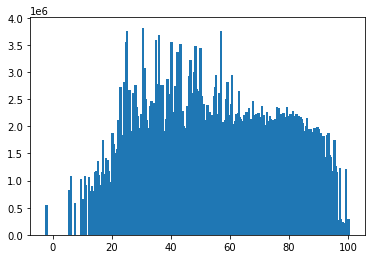

In [ ]:
import matplotlib.pyplot as plt

plt.bar(train_X['Temperature'], train_y)
plt.show()

In [ ]:
import numpy as np

bins_temperature = [0, 20, 40, 60, 80, 100]
train_X['Temperature_bin'] = pd.DataFrame(np.digitize(train_X['Temperature'], bins=bins_temperature))
train_X['Temperature_bin'].head()

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: Temperature_bin, dtype: float64

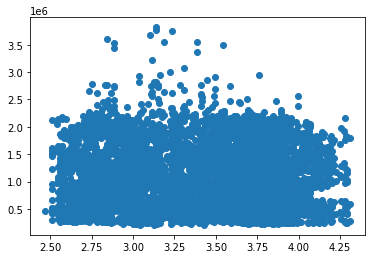

In [ ]:
plt.scatter(train_X['Fuel_Price'], train_y)
plt.show()

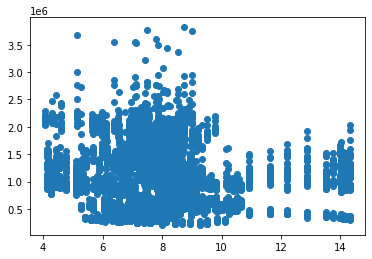

In [ ]:
plt.scatter(train_X['Unemployment'], train_y)
plt.show()